# Fundamental 20. 딥러닝 레이어의 이해 - Linear, Convolution

## Linear 레이어

Linear 레이어는 선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 한다.  

100차원의 데이터를 300차원으로 변환한다면 데이터를 더 풍부하게 표현하는 효과가 있고, 반대로 10차원의 데이터로 변환한다면 데이터를 집약시키는 효과가 있다.  

예를 들어 보자.
![image](https://user-images.githubusercontent.com/84179578/129466052-c00e7bf8-1ef1-4998-9883-b0042442aeda.png)  


위 그림의 두 사각형은 모두 (x, y) 2차원의 점 4개로 표현 가능하므로, 각각 (4, 2) 행렬 형태의 데이터로 표현할 수 있다. 두 사각형을 각각 어떤 하나의 정수로 표현하고자 할때 아래의 단계를 사용한다.  

- 1단계: (4, 2) x (2, 1) 행렬 = (4, )
- 2단계: (4, ) x (4, 1) 행렬 = (1, )

![image](https://user-images.githubusercontent.com/84179578/129466178-4bc6f973-54c0-4026-bea3-c64f54c60acd.png)

2차원을 1차원으로 변환하는 데에 (2, 1) 혹은 (2 x 1) 행렬이 하나 선언되고, 4차원을 1차원으로 변환하는 데에 (4, 1) 혹은 (4 x 1) 행렬이 하나 선언되고 각각의 행렬이 __Weight__ 이다. 여기서 모든 Weight의 모든 요소를 __Parameter__ 라고 한다.

이 과정을 코드로 표현하면 아래와 같다.

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


첫 번째 접근은 데이터를 집약하는 데에만 집중했으니, 이번엔 데이터를 더 풍부하게 만들어보자.  

- 1단계: (4, 2) x (2 x 3) 행렬 = (4, 3)
- 2단계: (4, 3) x (3 x 1) 행렬 = (4, )
- 3단계: (4, ) x (4 x 1) 행렬 = (1, )

![image](https://user-images.githubusercontent.com/84179578/129466222-9e183628-2173-4ce3-8f18-15c625a2b983.png)


위 과정을 코드로 나타내면 아래와 같다.

In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


1단계에서 2 x 3 = 6, 2단계에서 3 x 1 = 3, 3단계에서 4 x 1 = 4,  

총 6 + 3 + 4 = 13개의 Parameter가 사용된 것을 확인할 수 있다.

Parameter 가 많은 것이 무조건적으로 좋다고 할 수는 없다. 지나치게 많은 Parameter는 __과적합(Overfitting)__ 을 야기하기 때문이다.  

이런 방법들로 Weight의 형태만 선언해주면 그 파라미터 값을 임의의 실수가 채우고, 수많은 데이터를 거치며 가장 적합한 Weight를 알아서 찾아가는 과정이 바로 __훈련(Training)__ 이다.

`y=Wx+b` 에서 `b` 는 편향 값을 의미한다.  

파라미터를 아무리 돌리고 늘리고 해도 정확하게 근사할 수 없는 상황에서 원점을 평행이동하는 것만으로도 해결할 수 있기 때문에 실제로 편향은 선형변환된 값에 편향 파라미터 b를 더해주는 것으로 표현한다.

위의 코드에서 Dense 클래스 속 `use_bias` 파라미터를 True 로 바꿔주면 편향값을 추가할 수 있다.

----
----
## Convolution 레이어

- 1단계: (1920, 1080, 3) x [3 x 16 x 5 x 5 Weight & Stride 5] = (384, 216, 16)  _Convolution 레이어_
- 2단계: (384, 216, 16) → (384 x 216 x 16, )  _정보 집약_
- 3단계: (1327104, ) x [1327104 x 1 Weight] = (1, )  _정보 집약_

In [3]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


## Deconvolution 레이어

In [4]:
import numpy as np
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


AutoEncoder가 수행하는 Image Reconstruction Task는 x_train의 라벨이 바로 x_train 자신이 되기 때문에 y_train, y_test를 사용하지 않는다

In [5]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

`model.summary()` 메소드를 통해 네트워크의 Output이 어떻게 변해가는지도 확인할 수 있다.  

주의할 점은 `Conv2D` 레이어는 shape를 변화시키지 않고 있다는 점이다. Output shape를 변화시키는 것은 오롯이 `MaxPooling2D` 레이어의 역할이다.

`Conv2D` 레이어와 `UpSampling2D` 레이어를 거쳐 최종적으로 28 X 28 사이즈의 출력이 나온다.  
여기서도 shape를 변화시키는 것은 `UpSampling2D` 이다. 

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 30s 82ms/step - loss: 0.6678 - val_loss: 0.6653
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6641 - val_loss: 0.6606
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6590 - val_loss: 0.6545
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6525 - val_loss: 0.6466
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6440 - val_loss: 0.6362
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6328 - val_loss: 0.6227
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6183 - val_loss: 0.6053
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.5996 - val_loss: 0.5835
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.5767 - val_loss: 0.5588
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.5516 - val_l

훈련이 끝난 후, 실제로 우리가 만든 AutoEncoder가 MNIST 이미지를 제대로 생성하는지를 확인해보자.

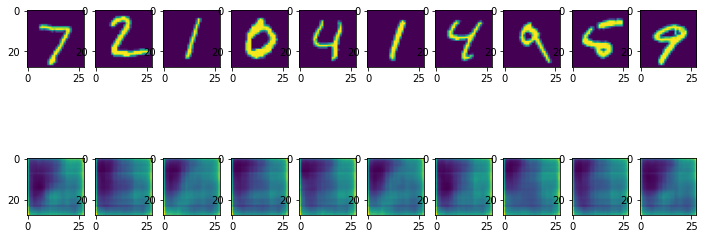

In [7]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

결과가 썩 만족스럽지는 않다. 하지만 동일한 Decoder 네트워크 구조를 가지고도 Variational Autoencoder나 DCGAN 등은 훨씬 훌륭한 이미지를 생성하기 때문에, 이것은 Decoder 네트워크 구조만의 문제는 아닐 것이다.

## Transposed Convolution

In [8]:
from tensorflow.python.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 88s 225ms/step - loss: 0.6962 - val_loss: 0.6955
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6952 - val_loss: 0.6945
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6942 - val_loss: 0.6934
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6931 - val_loss: 0.6922
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6919 - val_loss: 0.6910
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6906 - val_loss: 0.6896
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6892 - val_loss: 0.6881
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6876 - val_loss: 0.6862
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6856 - val_loss: 0.6840
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6832 - val_

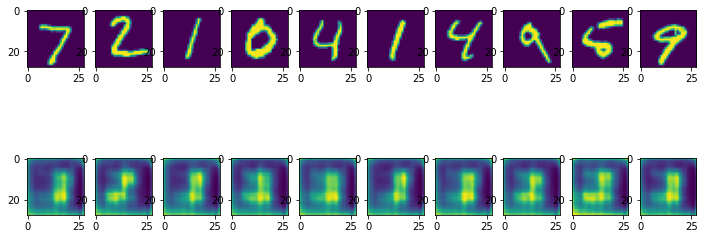

In [10]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])